Read in original data and make subset

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
data_news = pd.read_csv('News_Final.csv', delimiter=',')

random.seed(2018)

n = 1000

topic = data_news.Topic.value_counts()
weight = (topic/topic.sum()*n).values.round().astype(int)
print(weight)
print(topic.sum())


[364 307 234  95]
93239


In [3]:
data_facebook = pd.DataFrame()
data_google = pd.DataFrame()
data_linkedin = pd.DataFrame()

file_facebook = ('Facebook_Economy.csv',
                 'Facebook_Microsoft.csv',
                 'Facebook_Obama.csv',
                 'Facebook_Palestine.csv')
file_google = ('GooglePlus_Economy.csv',
               'GooglePlus_Microsoft.csv',
               'GooglePlus_Obama.csv',
               'GooglePlus_Palestine.csv')
file_linkedin = ('LinkedIn_Economy.csv',
                 'LinkedIn_Microsoft.csv',
                 'LinkedIn_Obama.csv',
                 'LinkedIn_Palestine.csv')

for k in file_facebook:
    data_temp = pd.read_csv(k, delimiter=',')
    data_facebook = data_facebook.append(data_temp)

for k in file_google:
    data_temp = pd.read_csv(k, delimiter=',')
    data_google = data_google.append(data_temp)

for k in file_linkedin:
    data_temp = pd.read_csv(k, delimiter=',')
    data_linkedin = data_linkedin.append(data_temp)


data_news = data_news.set_index('IDLink') 
data_facebook = data_facebook.set_index('IDLink') 
data_google = data_google.set_index('IDLink') 
data_linkedin = data_linkedin.set_index('IDLink') 

In [4]:
print(len(data_news.index))
print(len(data_facebook.index))
print(len(data_google.index))
print(len(data_linkedin.index))


print(len(data_facebook.index &data_news.index &  data_google.index & data_linkedin.index))

(data_news.index & data_facebook.index & data_google.index & data_linkedin.index).difference(data_facebook.index)

93239
83161
88677
88677
83164


Float64Index([], dtype='float64', name='IDLink')

In [5]:
data_facebook[data_facebook < 0 ] = 0
data_google[data_google < 0 ] = 0
data_linkedin[data_linkedin < 0 ] = 0

data_ts = data_facebook + data_google.loc[data_facebook.index] + data_linkedin.loc[data_facebook.index]
data_ts.columns = range(144)
data_ts.head()

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
IDLink,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,1,1,8,8,...,16,16,16,16,16,16,16,16,16,16
2.0,0,0,0,0,0,0,0,0,3,3,...,42,42,42,42,42,42,42,42,42,42
3.0,0,0,0,0,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
4.0,0,0,0,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
5.0,0,0,0,0,0,0,0,0,0,0,...,34,34,34,34,34,34,34,34,34,34


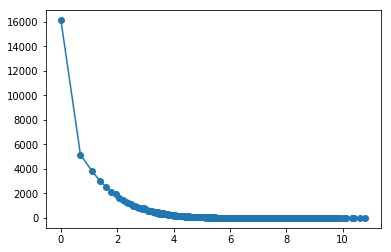

In [6]:
plt.plot(log(data_ts.max(1)+1).value_counts(),'o-')

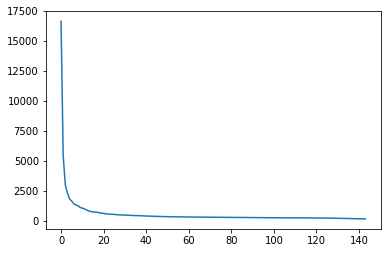

In [7]:
#scatter(data_ts.idxmax(1).value_counts()[:,0],data_ts.idxmax(1).value_counts()[:,1])
plt.plot(data_ts.idxmax(1).value_counts().values)

In [8]:
class Clean:
    def __init__(self, df):
        self.data = df 
        print('shape of orginal data:',self.data.shape)
    def filter(self, maximum=10, esssup = 10):
        self.toremove = (self.data.max(1) < maximum) | (self.data.idxmax(1).values < esssup)
        print('want to remove', sum(self.toremove),'rows')
    def remove(self, maximum=10, esssup = 10):
        self.filter(maximum, esssup)
        self.newdata = self.data.loc[~self.toremove]

In [9]:
cl_ts = Clean(data_ts)
cl_ts.remove(10)
cl_ts.newdata.shape

shape of orginal data: (83161, 144)
want to remove 39218 rows


(43943, 144)

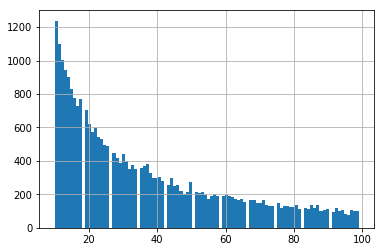

In [10]:
cl_ts.newdata.max(1)[cl_ts.newdata.max(1)<100].hist(bins=100)

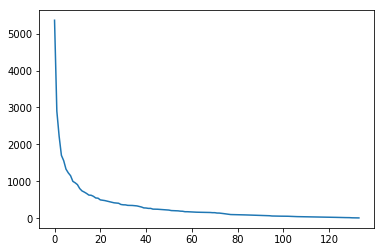

In [11]:
plt.plot(cl_ts.newdata.idxmax(1).value_counts().values)

In [12]:
Id = array([])

sub_news = data_news.loc[data_ts.index]

for i in range(len(weight)):
    Id_temp = random.choice(sub_news.index[sub_news.Topic==topic.index.values[i]], weight[i])
    Id = append(Id, Id_temp)
len(Id)

sub_news = data_news.loc[Id]
sub_ts = data_ts.loc[Id]

In [13]:
sub_news.to_csv('sub_news.csv')
sub_ts.to_csv('sub_ts.csv')

# Below are useless

data_facebook = data_facebook + (data_facebook <= 0).astype(int)
data_facebook.columns = range(144)
data_linkedin = data_linkedin + (data_facebook <= 0).astype(int)
data_facebook.columns = range(144)
data_facebook = data_facebook + (data_facebook <= 0).astype(int)
data_facebook.columns = range(144)

clfacebook = Clean(data_facebook)        
clfacebook.filter()
clgoogle = Clean(data_google)        
clgoogle.filter()
cllinkedin = Clean(data_linkedin)        
cllinkedin.filter()

sum(cllinkedin.remove|clgoogle.remove)   

maximum = data_facebook.max(1)
esssup = data_facebook.idxmax(1).values
remove = (maximum < 10) | (esssup <10)
print(sum(remove))
shape(data_facebook)

Id = array([])

for i in range(len(weight)):
    Id_temp = random.choice(data_news.IDLink[data_news.Topic==topic.index.values[i]], weight[i])
    Id = append(Id, Id_temp)
len(Id)

sub_news = (data_news.loc[Id])
sub_facebook = (data_facebook.loc[Id])
sub_google = (data_google.loc[Id])
sub_linkedin = (data_linkedin.loc[Id])

sub_news.to_csv('sub_news.csv')
sub_facebook.to_csv('sub_facebook.csv')
sub_google.to_csv('sub_google.csv')
sub_linkedin.to_csv('sub_linkedin.csv')